In [53]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy.stats as scs

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline


In [54]:
df = pd.read_csv('datawithnewcols.csv',index_col = 0)

In [55]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'Age_of_House',
       'Years_last_renovation', 'basement', 'distance_from_seattle',
       'distance_from_bellevue', 'distance_from_a_city',
       'distance_from_airport', 'biggerliving', 'biggerlot'],
      dtype='object')

In [56]:
df.drop(['id','date','yr_built','yr_renovated'],axis=1,inplace = True)

In [57]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_lot15,Age_of_House,Years_last_renovation,basement,distance_from_seattle,distance_from_bellevue,distance_from_a_city,distance_from_airport,biggerliving,biggerlot
count,1.922100e+04,19221.000000,19221.000000,19221.000000,1.922100e+04,19221.000000,19221.000000,19221.000000,19221.000000,19221.000000,...,19221.000000,19221.000000,19221.000000,19221.000000,19221.000000,19221.000000,19221.000000,19221.000000,19221.000000,19221.000000
mean,5.416398e+05,3.374642,2.117072,2082.420894,1.507376e+04,1.495031,0.007596,0.230373,3.409968,7.661048,...,12806.692108,48.960200,47.039748,0.384944,18.561477,17.275517,15.357939,21.621724,0.456844,0.399303
std,3.722478e+05,0.928539,0.769576,922.544859,4.081729e+04,0.540155,0.086825,0.762339,0.650280,1.175998,...,27576.842373,29.384666,28.966522,0.486595,10.739059,9.098646,9.873827,9.602891,0.498147,0.489768
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,...,651.000000,5.000000,5.000000,0.000000,1.235977,0.303167,0.303167,0.973432,0.000000,0.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,5100.000000,23.000000,21.000000,0.000000,9.755045,11.340352,8.008292,13.406358,0.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,...,7620.000000,45.000000,43.000000,0.000000,16.611524,15.198443,12.818211,21.699382,0.000000,0.000000
75%,6.440000e+05,4.000000,2.500000,2550.000000,1.071600e+04,2.000000,0.000000,0.000000,4.000000,8.000000,...,10092.000000,69.000000,66.000000,1.000000,25.513835,21.312309,19.917830,28.712338,1.000000,1.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,...,871200.000000,120.000000,120.000000,1.000000,77.240209,67.260521,67.260521,79.793415,1.000000,1.000000


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19221 entries, 0 to 19220
Data columns (total 26 columns):
price                     19221 non-null float64
bedrooms                  19221 non-null int64
bathrooms                 19221 non-null float64
sqft_living               19221 non-null int64
sqft_lot                  19221 non-null int64
floors                    19221 non-null float64
waterfront                19221 non-null float64
view                      19221 non-null float64
condition                 19221 non-null int64
grade                     19221 non-null int64
sqft_above                19221 non-null int64
sqft_basement             19221 non-null float64
zipcode                   19221 non-null int64
lat                       19221 non-null float64
long                      19221 non-null float64
sqft_living15             19221 non-null int64
sqft_lot15                19221 non-null int64
Age_of_House              19221 non-null int64
Years_last_renovation     192

In [59]:
def remove_outliers(df, col, threshold = 3):
    zscores = scs.zscore(df[col])
    indices = np.abs(np.where(zscores > threshold))
    return indices[0]



In [60]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_lot15,Age_of_House,Years_last_renovation,basement,distance_from_seattle,distance_from_bellevue,distance_from_a_city,distance_from_airport,biggerliving,biggerlot
0,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,...,7639,69,29,1,12.613856,15.150174,12.613856,30.859494,1,0
1,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,...,8062,87,87,0,16.333282,14.375822,14.375822,33.112379,0,1
2,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,...,5000,55,55,1,10.617501,17.522706,10.617501,10.988905,1,0
3,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,...,7503,33,33,0,21.759524,11.683886,11.683886,27.230991,0,1
4,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,...,101930,19,19,1,25.295727,15.508940,15.508940,32.449837,1,0


In [61]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_lot15,Age_of_House,Years_last_renovation,basement,distance_from_seattle,distance_from_bellevue,distance_from_a_city,distance_from_airport,biggerliving,biggerlot
count,1.922100e+04,19221.000000,19221.000000,19221.000000,1.922100e+04,19221.000000,19221.000000,19221.000000,19221.000000,19221.000000,...,19221.000000,19221.000000,19221.000000,19221.000000,19221.000000,19221.000000,19221.000000,19221.000000,19221.000000,19221.000000
mean,5.416398e+05,3.374642,2.117072,2082.420894,1.507376e+04,1.495031,0.007596,0.230373,3.409968,7.661048,...,12806.692108,48.960200,47.039748,0.384944,18.561477,17.275517,15.357939,21.621724,0.456844,0.399303
std,3.722478e+05,0.928539,0.769576,922.544859,4.081729e+04,0.540155,0.086825,0.762339,0.650280,1.175998,...,27576.842373,29.384666,28.966522,0.486595,10.739059,9.098646,9.873827,9.602891,0.498147,0.489768
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,...,651.000000,5.000000,5.000000,0.000000,1.235977,0.303167,0.303167,0.973432,0.000000,0.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,5100.000000,23.000000,21.000000,0.000000,9.755045,11.340352,8.008292,13.406358,0.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,...,7620.000000,45.000000,43.000000,0.000000,16.611524,15.198443,12.818211,21.699382,0.000000,0.000000
75%,6.440000e+05,4.000000,2.500000,2550.000000,1.071600e+04,2.000000,0.000000,0.000000,4.000000,8.000000,...,10092.000000,69.000000,66.000000,1.000000,25.513835,21.312309,19.917830,28.712338,1.000000,1.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,...,871200.000000,120.000000,120.000000,1.000000,77.240209,67.260521,67.260521,79.793415,1.000000,1.000000


In [62]:
# Explore it
numerical_cols = []
for col in df.columns:
    if df[col].dtype in [np.int64, np.float64]:
        numerical_cols.append(col)

len(numerical_cols), numerical_cols

(26,
 ['price',
  'bedrooms',
  'bathrooms',
  'sqft_living',
  'sqft_lot',
  'floors',
  'waterfront',
  'view',
  'condition',
  'grade',
  'sqft_above',
  'sqft_basement',
  'zipcode',
  'lat',
  'long',
  'sqft_living15',
  'sqft_lot15',
  'Age_of_House',
  'Years_last_renovation',
  'basement',
  'distance_from_seattle',
  'distance_from_bellevue',
  'distance_from_a_city',
  'distance_from_airport',
  'biggerliving',
  'biggerlot'])

In [64]:
check_col = numerical_cols

all_indices = []
for col in check_col:
    indices = remove_outliers(df, col, threshold = 3)
    all_indices.extend(indices)
all_indices = np.unique(all_indices)

In [65]:
df.drop(all_indices,inplace=True)

In [66]:
df.reset_index(drop=True,inplace=True)

In [67]:
df.shape

(17206, 26)

In [72]:
numerical_cols

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'Age_of_House',
 'Years_last_renovation',
 'basement',
 'distance_from_seattle',
 'distance_from_bellevue',
 'distance_from_a_city',
 'distance_from_airport',
 'biggerliving',
 'biggerlot']

# SalesPrice Distribution


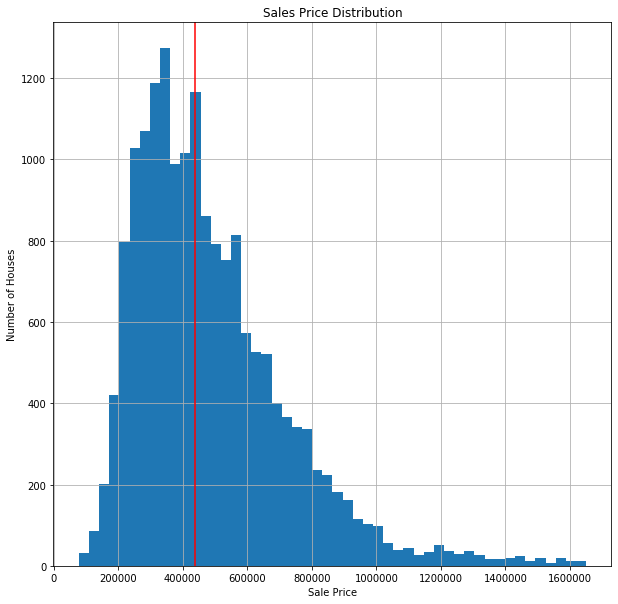

In [25]:

salesprice = df["price"]
salesprice.hist(figsize=(10,10),bins = 50);
plt.title("Sales Price Distribution");
plt.xlabel("Sale Price");
plt.ylabel("Number of Houses");
plt.axvline(salesprice.median(), color = 'red');

# Home Value over the Decades

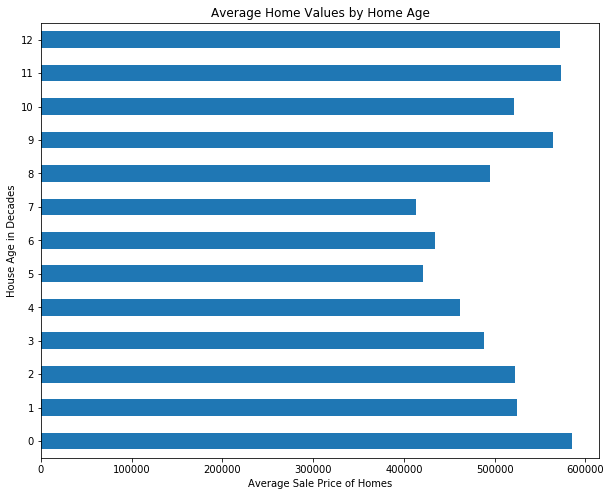

In [26]:

df['decades'] = df['Age_of_House']//10
to_plot = df.groupby('decades')['price'].mean()
to_plot.plot(kind='barh', figsize=(10,8))
plt.ylabel('House Age in Decades')
plt.xlabel('Average Sale Price of Homes')
plt.title('Average Home Values by Home Age');


In [37]:
categoricals = ['floors','view']

# Viewing Categorical Variables

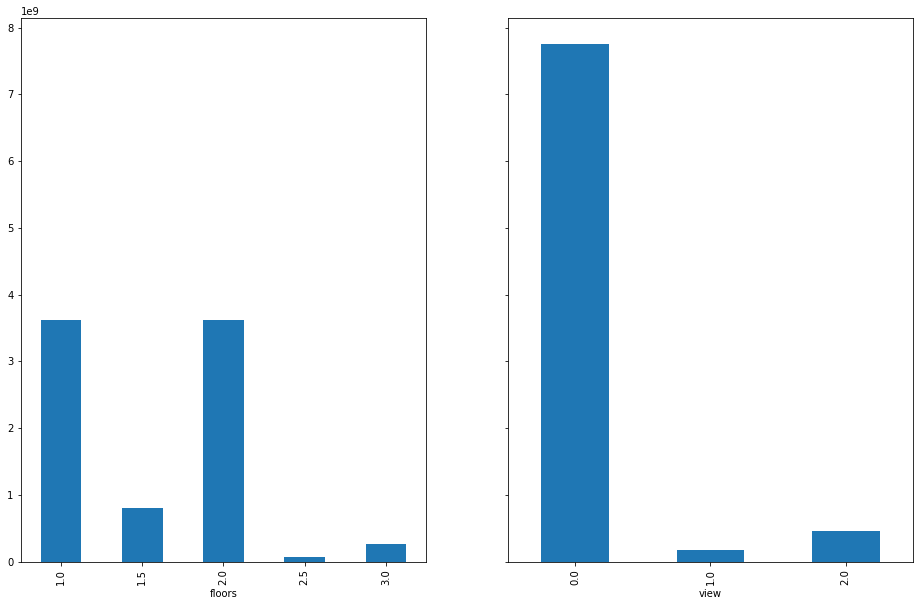

In [38]:

# Create bar plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,10), sharey=True)
for xcol, ax in zip(categoricals, axes.flatten()):
    df.groupby(xcol)['price'].sum().plot(kind='bar',ax=ax)
#     df.groupby(xcol)['price'].mean().plot(kind='bar',ax=ax,)


In [76]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'Age_of_House', 'Years_last_renovation', 'basement',
       'distance_from_seattle', 'distance_from_bellevue',
       'distance_from_a_city', 'distance_from_airport', 'biggerliving',
       'biggerlot'],
      dtype='object')

In [77]:
numericals = ['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'sqft_above', 'sqft_basement'
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'Age_of_House',
       'Years_last_renovation', 'basement', 'distance_from_seattle',
       'distance_from_bellevue', 'distance_from_a_city',
       'distance_from_airport', 'biggerliving', 'biggerlot']

# Correlation between Variables

In [78]:
corr = df.corr()

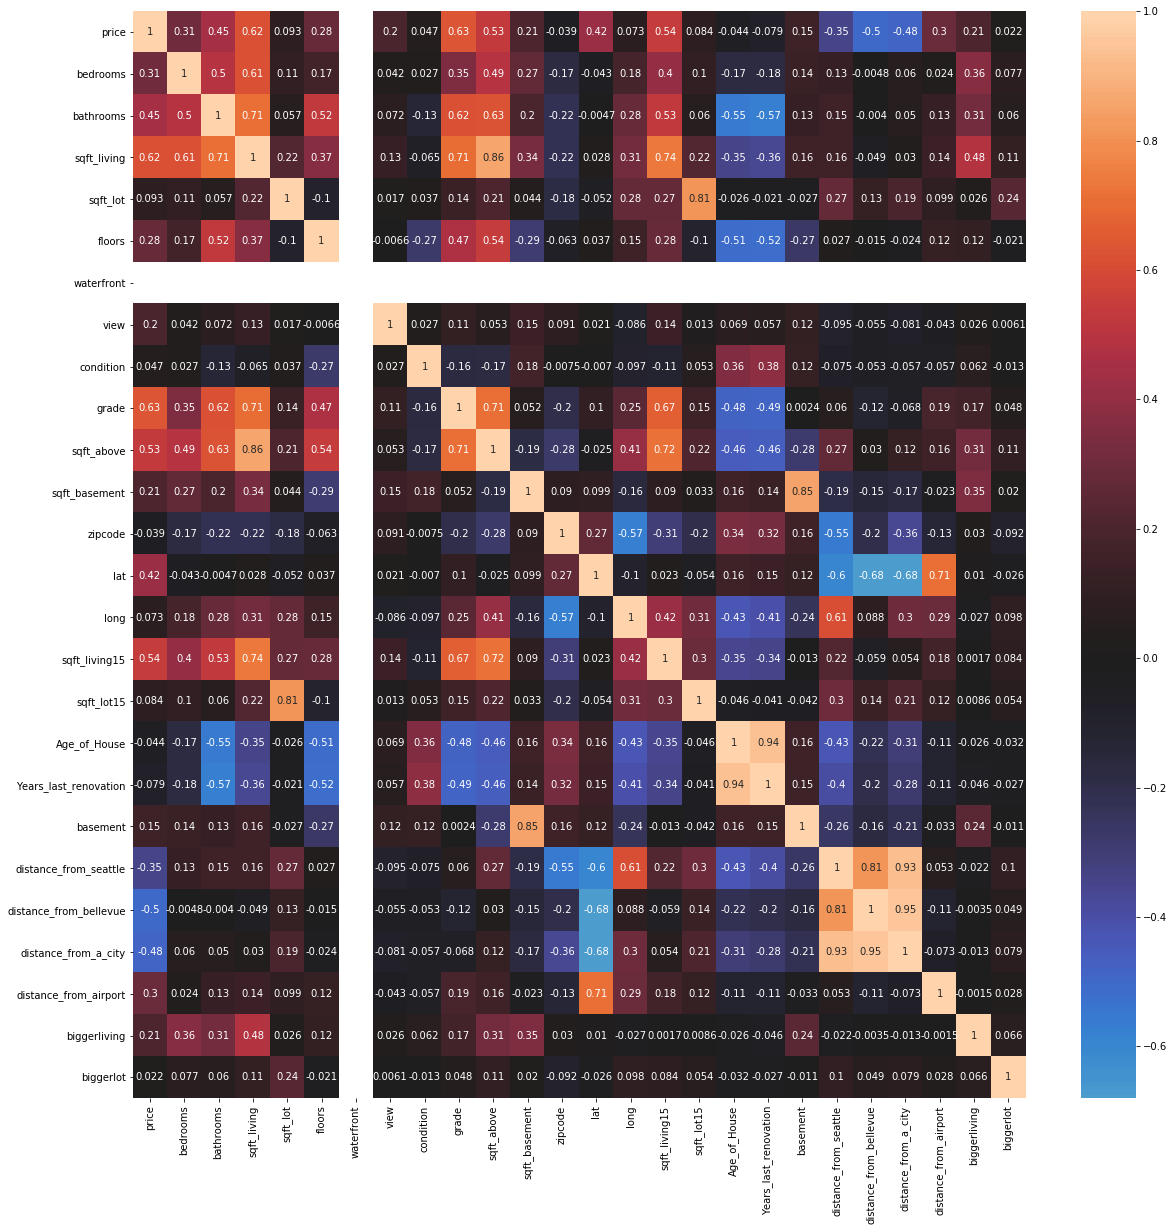

In [79]:
# Your code here
plt.figure(figsize=(20,20))
sns.heatmap(corr, center=0, annot=True);
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

In [80]:
df_cont = df[numericals]
df_cont.head()
df_cont.hist(figsize = (20,20))
plt.show()

KeyError: "['yr_built', 'yr_renovated'] not in index"

In [81]:
totransform = ['bathrooms','bedrooms','distance_from_a_city','sqft_living','sqft_living15',
             'sqft_lot','sqft_lot15']
df_transform = df[totransform]


In [60]:
import numpy as np

In [61]:
df['bathroomlog'] = np.log(df['bathrooms'])

In [62]:
numericals.remove('price')

In [63]:
numericals

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'sqft_living15',
 'sqft_lot15',
 'Age_of_House',
 'Years_last_renovation',
 'distance_from_a_city',
 'distance_from_airport']

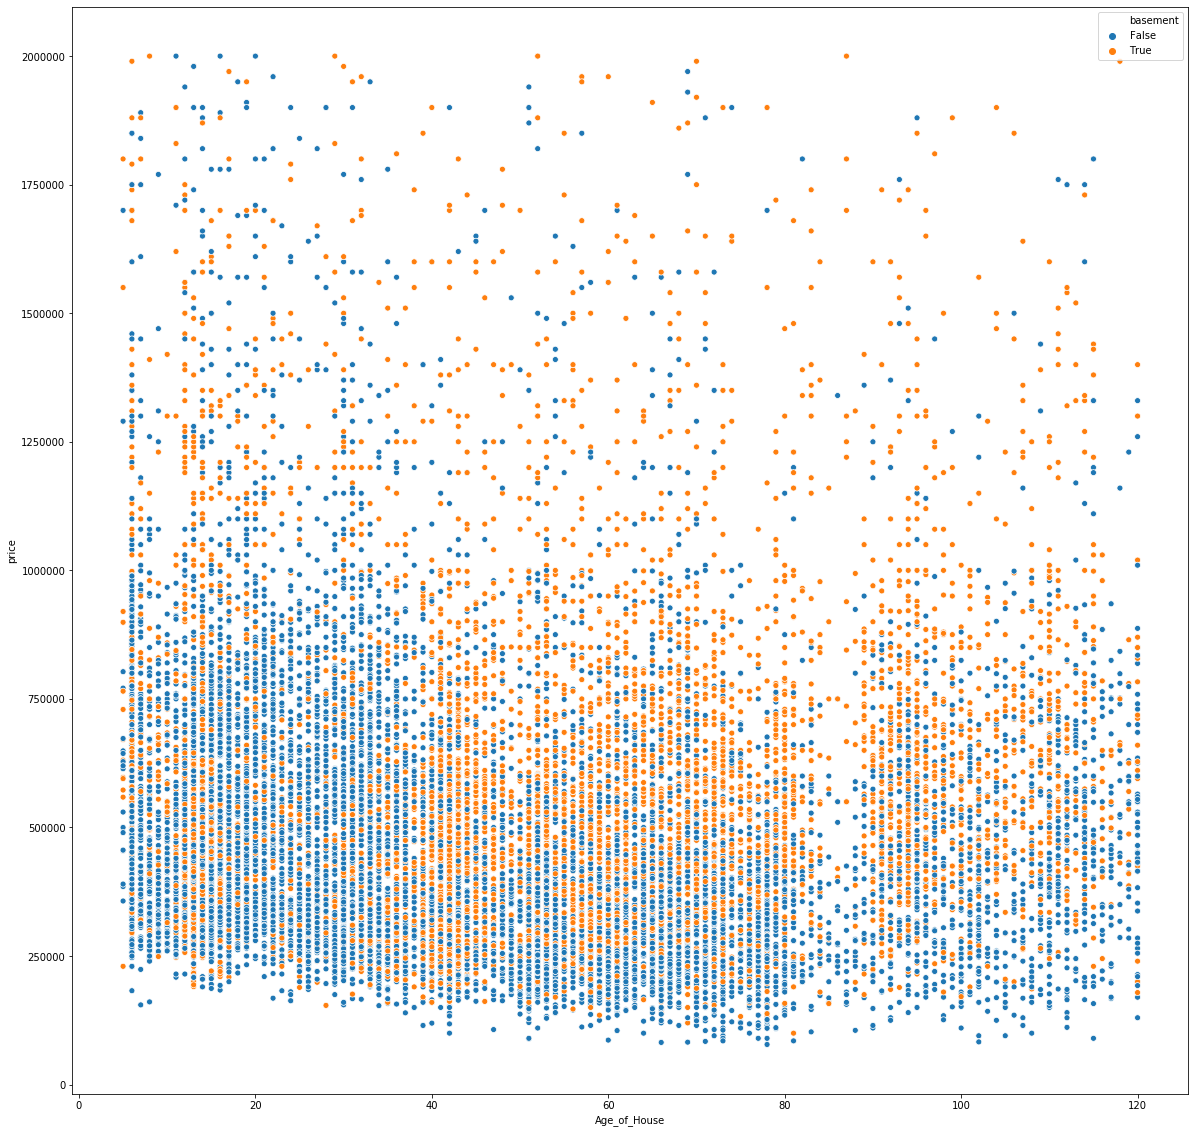

In [64]:
plt.figure(figsize=(20,20))
sns.scatterplot(y='price',x='Age_of_House',data=df,hue='basement')

In [65]:
dftop1000 = df.sort_values(by='price',ascending = False)[:1000]

In [66]:
df['zipcode'].value_counts()

98103    538
98038    528
98115    514
98052    505
98117    495
        ... 
98010     87
98102     83
98024     73
98148     51
98039     27
Name: zipcode, Length: 70, dtype: int64

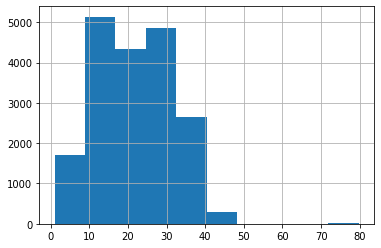

In [67]:
df['distance_from_airport'].hist()

In [68]:
airport = df['distance_from_airport']

In [71]:
df['distance_from_airport']

1        30.859494
2        33.112379
3        10.988905
4        27.230991
5        32.449837
           ...    
21591    16.906717
21592    28.614456
21593     8.730896
21594    16.764856
21596    16.731520
Name: distance_from_airport, Length: 19002, dtype: float64

In [73]:

dfzip = df.groupby('zipcode')['price'].agg(['mean','median','count'])

In [74]:
dfzip.reset_index(inplace = True)

In [75]:
dfzip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 4 columns):
zipcode    70 non-null int64
mean       70 non-null float64
median     70 non-null float64
count      70 non-null int64
dtypes: float64(2), int64(2)
memory usage: 2.3 KB


In [76]:
dfzip['mean'] = dfzip['mean'].astype('int64')
dfzip['median'] = dfzip['median'].astype('int64')

In [77]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_lot15,Age_of_House,Years_last_renovation,basement,distance_from_seattle,distance_from_bellevue,distance_from_a_city,distance_from_airport,decades,bathroomlog
price,1.000000,0.322691,0.505899,0.678364,0.094727,0.280723,0.155235,0.346082,0.037808,0.681265,...,0.085810,-0.066510,-0.104688,0.170285,-0.312331,-0.451783,-0.431322,0.206271,-0.067047,0.463297
bedrooms,0.322691,1.000000,0.520397,0.600524,0.028582,0.180692,-0.023418,0.068160,0.020746,0.364399,...,0.027468,-0.176589,-0.182475,0.149400,0.078389,-0.045956,0.014756,0.012719,-0.176718,0.516395
bathrooms,0.505899,0.520397,1.000000,0.738212,0.074823,0.512206,0.019616,0.145820,-0.133071,0.651109,...,0.075751,-0.531114,-0.552425,0.147716,0.104015,-0.045558,0.006375,0.110850,-0.527264,0.976007
sqft_living,0.678364,0.600524,0.738212,1.000000,0.169348,0.357607,0.038067,0.237098,-0.064883,0.749883,...,0.180517,-0.342986,-0.357608,0.185291,0.105204,-0.082917,-0.012303,0.119555,-0.341680,0.704998
sqft_lot,0.094727,0.028582,0.074823,0.169348,1.000000,-0.010085,0.021330,0.064978,-0.012780,0.109481,...,0.714532,-0.053957,-0.051884,-0.037994,0.246331,0.180996,0.203281,0.124073,-0.052573,0.066333
floors,0.280723,0.180692,0.512206,0.357607,-0.010085,1.000000,0.008586,0.014074,-0.268428,0.459285,...,-0.014618,-0.499753,-0.508053,-0.258927,0.008889,-0.033180,-0.038997,0.113479,-0.497740,0.502868
waterfront,0.155235,-0.023418,0.019616,0.038067,0.021330,0.008586,1.000000,0.360318,0.015337,0.034261,...,0.029648,0.037609,0.019179,0.024755,-0.003508,0.013528,0.006273,-0.047746,0.037809,0.014746
view,0.346082,0.068160,0.145820,0.237098,0.064978,0.014074,0.360318,1.000000,0.042049,0.206946,...,0.064074,0.061021,0.035158,0.163681,-0.067712,-0.032124,-0.055999,-0.043669,0.061282,0.128329
condition,0.037808,0.020746,-0.133071,-0.064883,-0.012780,-0.268428,0.015337,0.042049,1.000000,-0.153541,...,-0.003648,0.360215,0.387753,0.126591,-0.069081,-0.041185,-0.048415,-0.063764,0.359780,-0.117399
grade,0.681265,0.364399,0.651109,0.749883,0.109481,0.459285,0.034261,0.206946,-0.153541,1.000000,...,0.115580,-0.463654,-0.471079,0.033567,0.023356,-0.147142,-0.096851,0.156082,-0.459553,0.633511


In [78]:
dfzip

,zipcode,mean,median,count
0,98001,278733,259450,328
1,98002,234927,235000,178
2,98003,288682,264000,255
3,98004,1175578,1050000,250
4,98005,813864,772325,158
...,...,...,...,...
65,98177,629600,554000,229
66,98178,315560,280000,233
67,98188,288903,265000,119
68,98198,302883,266250,242


# Linearity

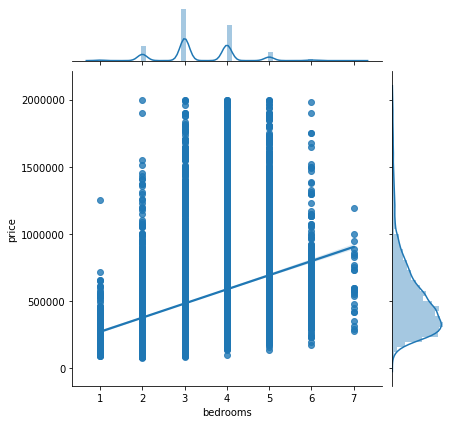

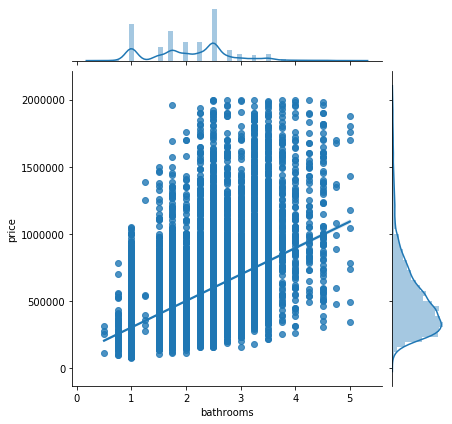

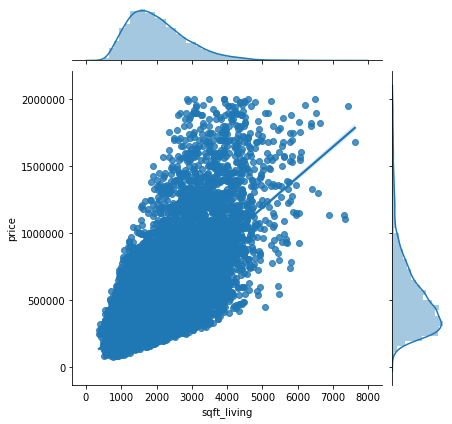

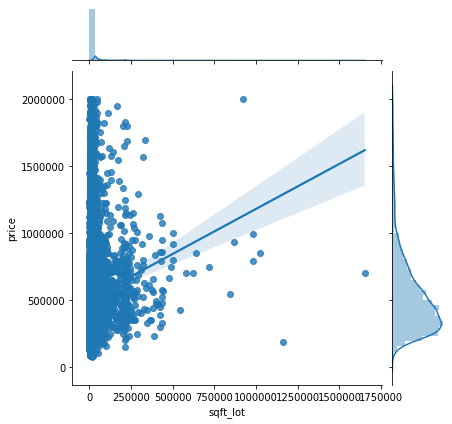

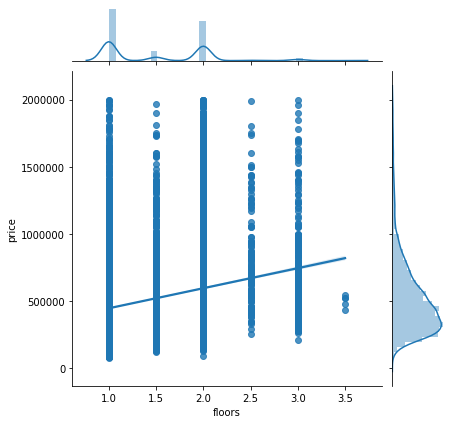

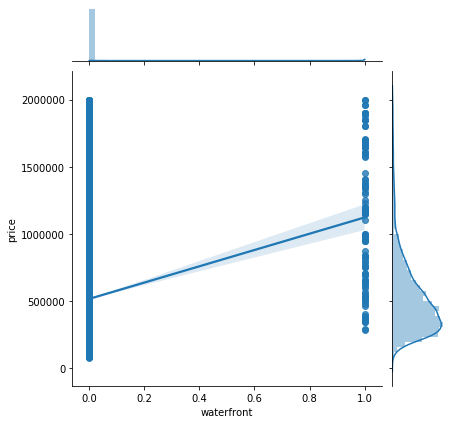

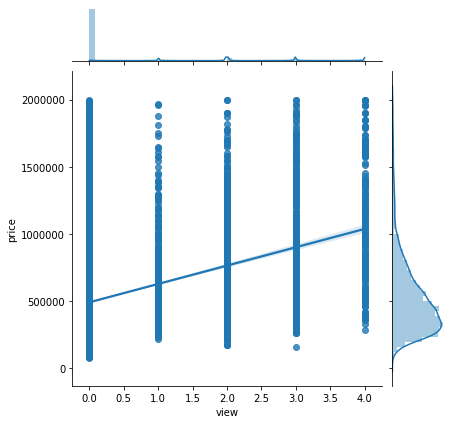

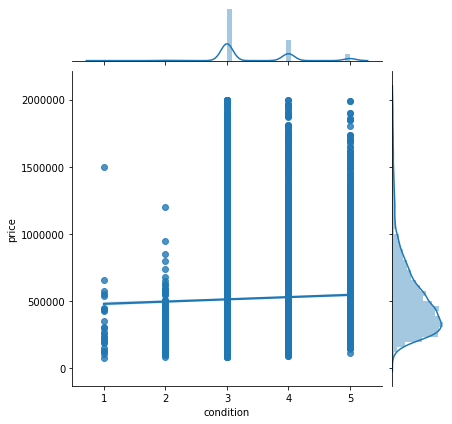

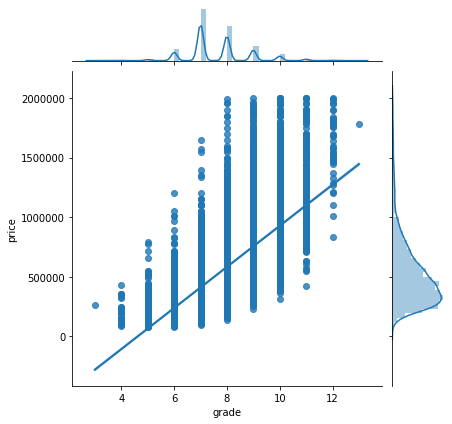

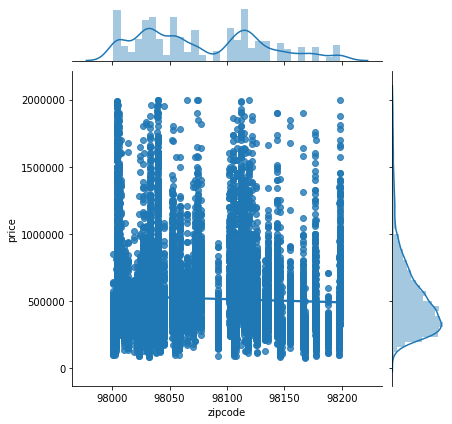

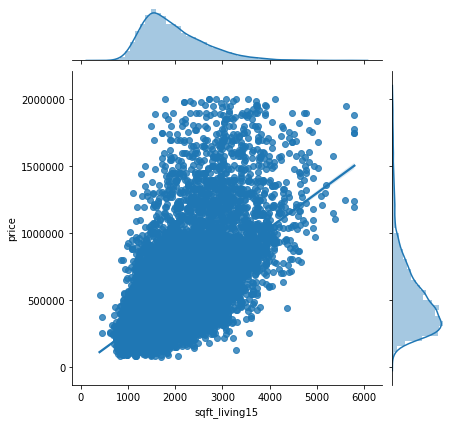

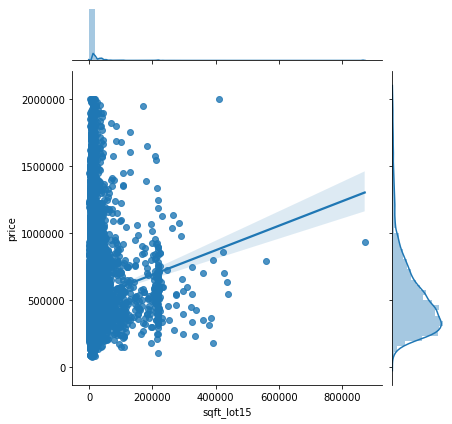

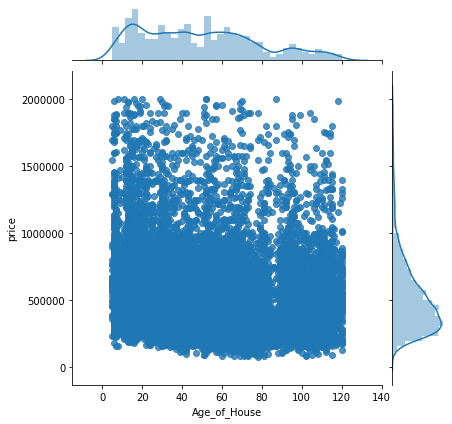

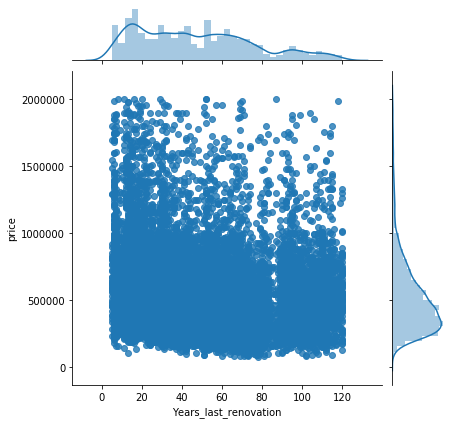

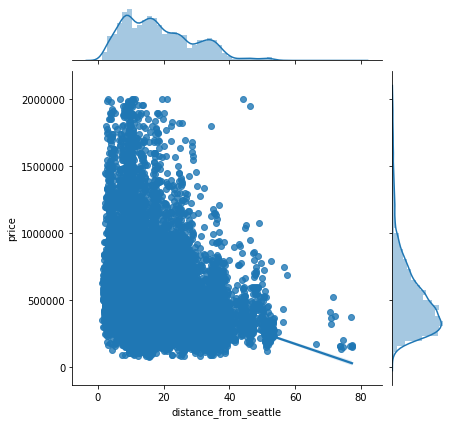

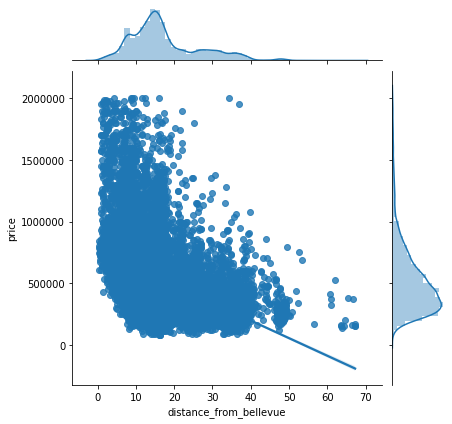

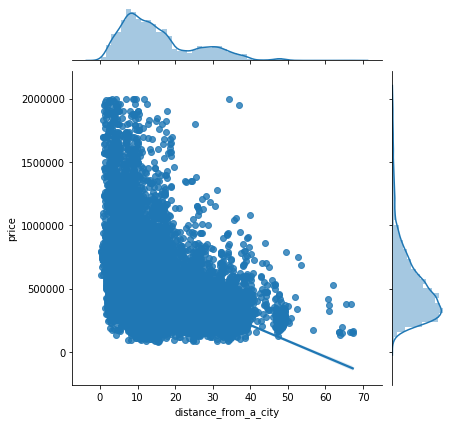

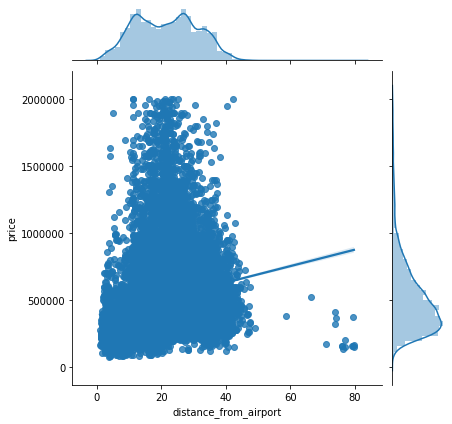

In [79]:
for col in numerical_cols:
    sns.jointplot(x = col,y ='price',data=df, kind='reg')